In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

tweets = pd.read_csv("/Users/harshjhunjhunwala/Desktop/github_datasets/charlottesville-on-twitter/aug15_sample.csv")

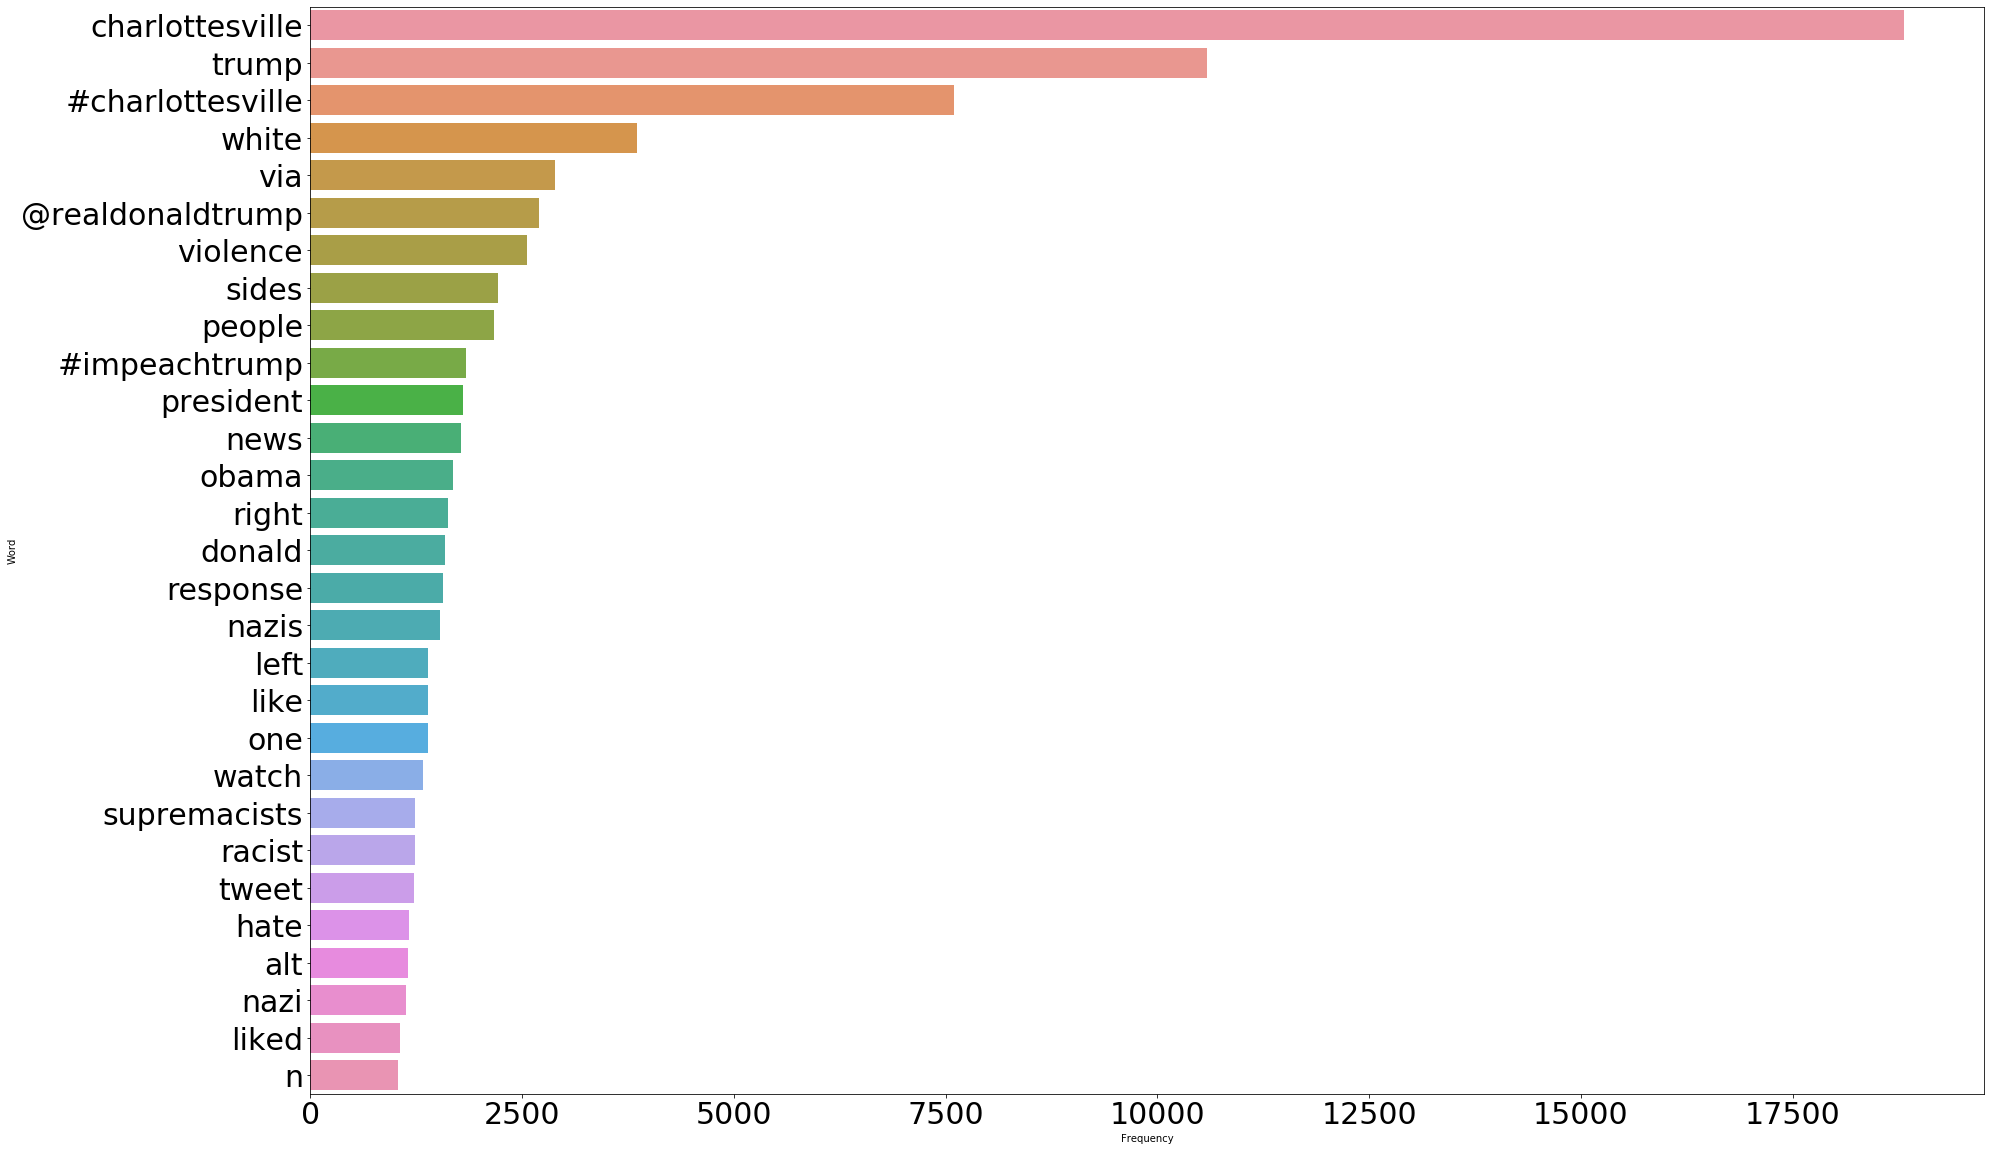

In [2]:
top_N = 30
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (tweets['full_text']
           .str.lower()
           .replace([r'\|', RE_stopwords, r"(&amp)|,|;|\"|\.|\?|’|!|'|:|-|\\|/|https"], [' ', ' ', ' '], regex=True)
           .str.cat(sep=' ')
           .split()
)
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

rslt = rslt.iloc[1:]

plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt.index, x="Frequency", data=rslt)
ax.tick_params(labelsize=30)

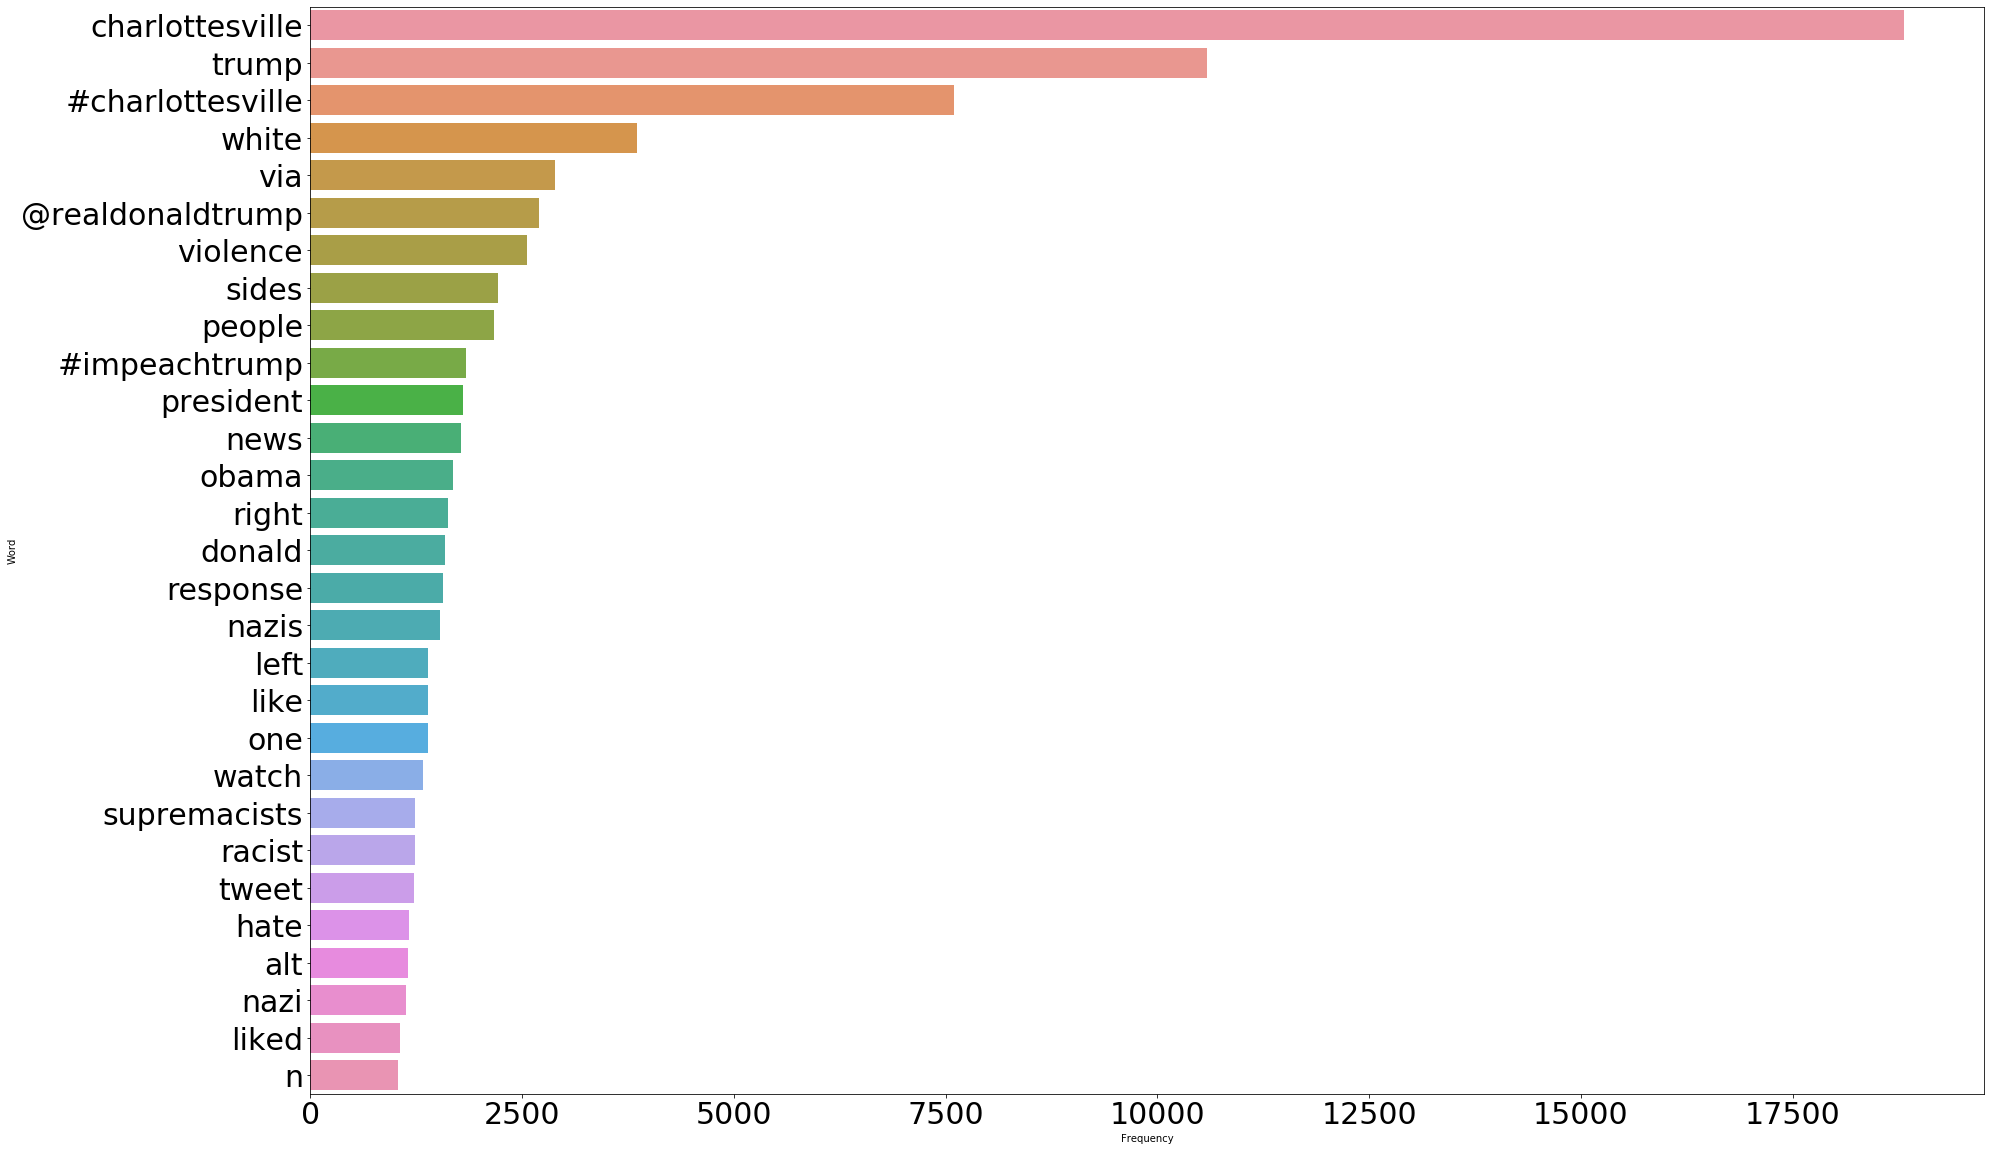

In [9]:
tags = tweets['hashtags'].str.lower().str.cat(sep=' ').split()
hashtags = pd.DataFrame(Counter(tags).most_common(top_N), columns=['Hashtags', 'Frequency']).set_index('Hashtags')
hashtags = hashtags.iloc[1:]

plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt.index, x="Frequency", data=rslt)
ax.tick_params(labelsize=30)